In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('./img/fish01.jpg')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

<Figure size 1200x400 with 2 Axes>

## Q.11. 平滑化フィルタ, Smoothing filter
平滑化フィルタはフィルタ内の画素の平均値を出力するフィルタ

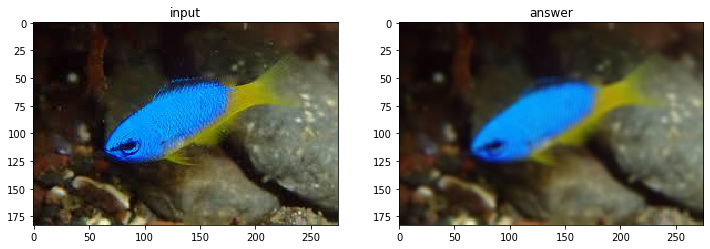

In [2]:
img_smoth = cv2.blur(img_orig, (5, 5))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

### カーネルサイズを変えてみる
カーネルサイズを大きくすると、ノイズが消えると同時に画像がぼやけるようになる。

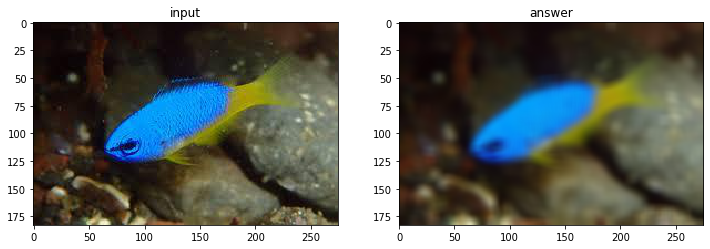

In [3]:
img_smooth = cv2.blur(img_orig, (9, 9))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smooth)
plt.show()

## Q.12. モーションフィルタ, Motion filter
モーションフィルタとは対角方向の平均値を取るフィルタである。

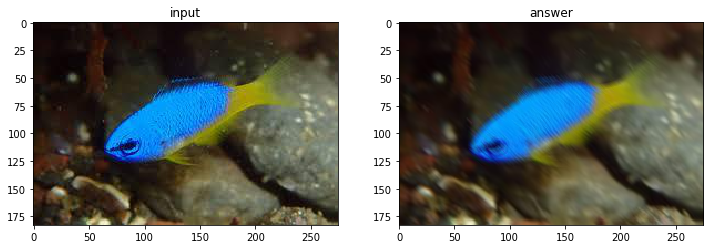

In [4]:
def filter_motion(img, k_size=(3, 3)):
    kernel = np.zeros(k_size)
    kernel[range(k_size[0]), range(k_size[0])] = 1 / k_size[0]
    return cv2.filter2D(img, -1, kernel)

img_motion = filter_motion(img_orig, k_size=(5, 5))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_motion)
plt.show()

## Q.13. Max-Minフィルタ, Max-Min filter
Max-Minフィルタとはフィルタ内の画素の最大値と最小値の差を出力するフィルタであり、エッジ検出のフィルタの一つである。\
エッジ検出とは画像内の線を検出することであり、このような画像内の情報を抜き出す操作を特徴抽出と呼ぶ。\
エッジ検出では多くの場合、ゲレースケール画像に対してフィルタリングを行う。

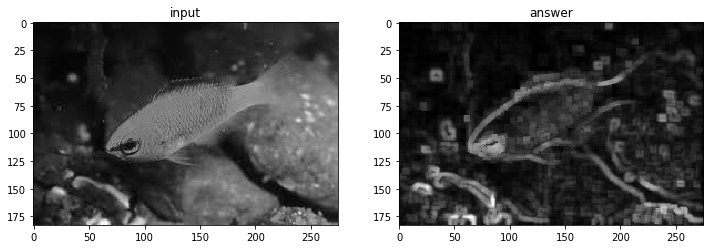

In [7]:
def filter_max_min(img, ksize=(5, 5)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    if len(_img.shape) == 2:
        _img = np.expand_dims(_img, axis=-1)
        
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = _img[iy:iy+ksize_h, ix:ix+ksize_w, ic].max() - _img[iy:iy+ksize_h, ix:ix+ksize_w, ic].min()
                
    out = out[pad_top:pad_top+h, pad_left:pad_left+w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_mm = filter_max_min(img_gray, (5, 5))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_mm[..., 0], cmap='gray')
plt.show()

## Q.14. 微分フィルタ, Differential filter
微分フィルタは輝度の急激な変化が怒っている部分のエッジを取り出すフィルタ。隣り合う画素同士の差を取る。

In [ ]:
def filter_diff(img, mode='x'):
    kernel = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]])
    
    if mode == 'y':
        kernel = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]])
    return cv2.filter2D(img, -1, kernel)

img_diff_x = filter_diff(img_gray, mode='x')
img_diff_y = filter_diff(img_gray, mode='y')

plt.